Library Imports

In [1]:
!pip install spacy==3.7.6
!python -m spacy download en_core_web_sm==3.7.1
!pip install nltk==3.9.1
!pip install beautifulsoup4==3.2.2
!pip install textblob==0.18.0.post0
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall
!pip install googletrans==4.0.0-rc1
!pip install gensim



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud


✘ No compatible package found for 'en_core_web_sm==3.7.1' (spaCy
v3.7.6)

ERROR: Ignored the following yanked versions: 4.13.0
ERROR: Could not find a version that satisfies the requirement beautifulsoup4==3.2.2 (from versions: 4.0.1, 4.0.2, 4.0.3, 4.0.4, 4.0.5, 4.1.0, 4.1.1, 4.1.2, 4.1.3, 4.2.0, 4.2.1, 4.3.0, 4.3.1, 4.3.2, 4.4.0, 4.4.1, 4.5.0, 4.5.1, 4.5.2, 4.5.3, 4.6.0, 4.6.1, 4.6.2, 4.6.3, 4.7.0, 4.7.1, 4.8.0, 4.8.1, 4.8.2, 4.9.0, 4.9.1, 4.9.2, 4.9.3, 4.10.0, 4.11.0, 4.11.1, 4.11.2, 4.12.0, 4.12.1, 4.12.2, 4.12.3, 4.13.0b2, 4.13.0b3, 4.13.1, 4.13.2, 4.13.3, 4.13.4)
ERROR: No matching distribution found for beautifulsoup4==3.2.2
  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-v_dkpcx4
  Running command git clone --filter=blob:none --quiet https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-v_dkpcx4
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit 0f56a6502679f6750b7f0ffed98f590d1f0246bd
  Prepari

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPooling1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [4]:
fake=pd.read_csv('Fake.csv')

In [5]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [7]:
fake['subject'].value_counts()

,count
subject,
News,9050
politics,6841
left-news,4459
Government News,1570
US_News,783
Middle-east,778


<Axes: xlabel='subject', ylabel='count'>

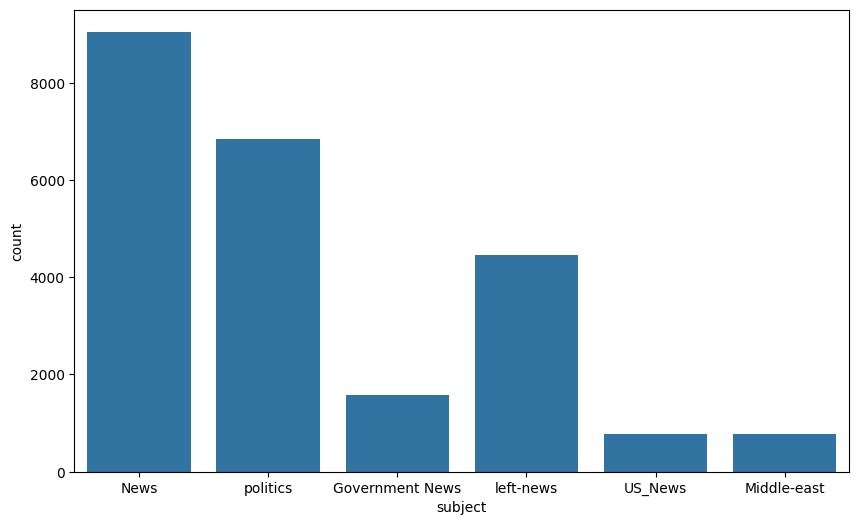

In [8]:
plt.figure(figsize=(10,6))
sns.countplot(x='subject',data=fake)

Wordcloud

In [9]:
text= ' '.join(fake['text'].tolist())

In [10]:
' '.join(['this','is','a','data'])

'this is a data'

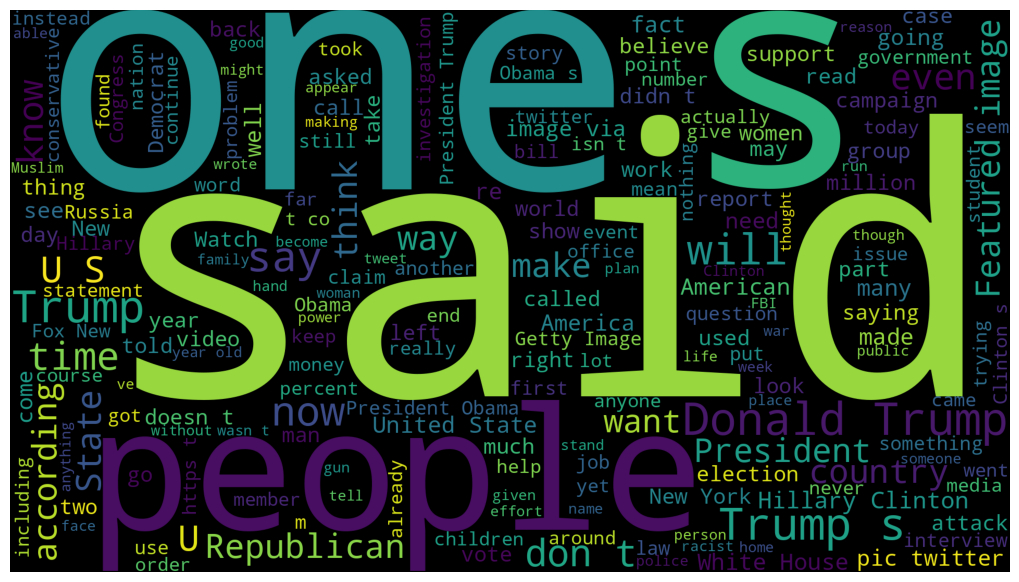

In [11]:
wordcloud=WordCloud(width=1920, height=1080).generate(text)
fig=plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Exploring Real news

In [12]:
real = pd.read_csv('True.csv')

In [13]:
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [14]:
real.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [15]:
real['subject'].value_counts()

,count
subject,
politicsNews,11272
worldnews,10145


In [16]:
text= ' '.join(real['text'].tolist())

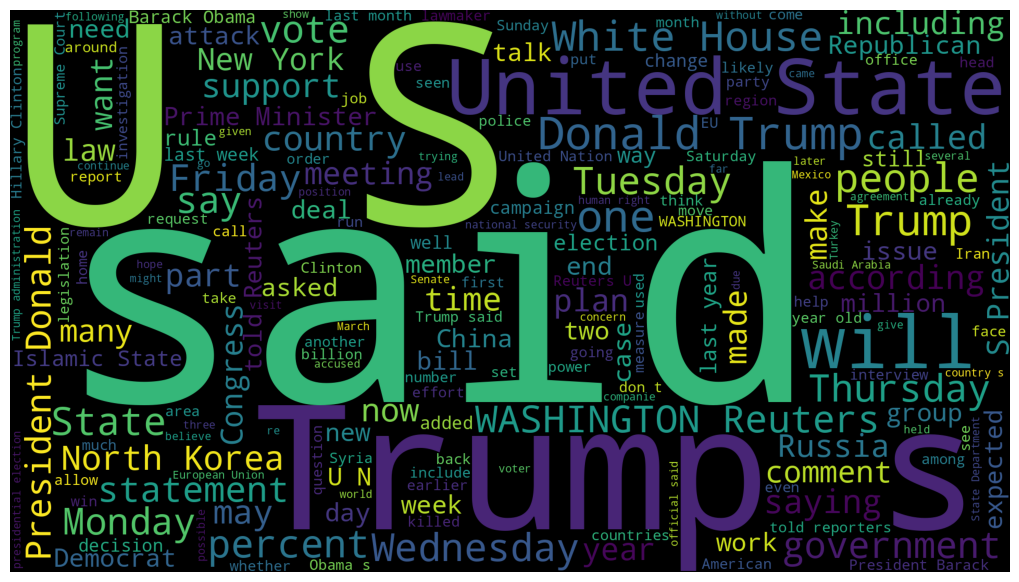

In [17]:
wordcloud=WordCloud(width=1920, height=1080).generate(text)
fig=plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Cleaning the data


In [18]:
real.sample(5)

,title,text,subject,date
3954,Conservative U.S. think tank Heritage Foundati...,"WASHINGTON(Reuters) - The Heritage Foundation,...",politicsNews,"May 2, 2017"
12621,Mexican opposition leader Anaya to seek presid...,MEXICO CITY (Reuters) - Mexican opposition lea...,worldnews,"December 10, 2017"
12165,U.S. says it wants Syrian government to negoti...,WASHINGTON (Reuters) - The United States on Fr...,worldnews,"December 15, 2017"
15511,Jailed Hong Kong democracy activists win last ...,HONG KONG (Reuters) - A Hong Kong court on Tue...,worldnews,"November 7, 2017"
9335,NY attorney general slams Trump's comment on j...,WASHINGTON (Reuters) - New York’s attorney gen...,politicsNews,"May 31, 2016"


In [19]:
unknown_publishers =[]
for index, row in enumerate(real.text.values):
  try:
    record = row.split('-',maxsplit=1)
    record[1]

    assert(len(record[0])<120)
  except:
    unknown_publishers.append(index)

In [20]:
len(unknown_publishers)

222

In [21]:
real.iloc[unknown_publishers].text

,text
7,The following statements were posted to the ve...
8,The following statements were posted to the ve...
12,The following statements were posted to the ve...
13,The following statements were posted to the ve...
14,"(In Dec. 25 story, in second paragraph, corre..."
...,...
20135,(Story corrects to million from billion in pa...
20500,"(This Sept 8 story corrects headline, clarifi..."
20667,"(Story refiles to add dropped word not , in ..."
21246,(Story corrects third paragraph to show Mosul...


In [22]:
real.iloc[8970]

,8970
title,Graphic: Supreme Court roundup
text,
subject,politicsNews
date,"June 16, 2016"


In [23]:
real = real.drop(8970, axis=0)

In [24]:
publisher = []
tmp_text =[]

for index, row in enumerate(real.text.values):
  if index in unknown_publishers:
    tmp_text.append(row)
    publisher.append('Unknown')

  else:
    record = row.split('-', maxsplit=1)
    publisher.append(record[0].strip())
    tmp_text.append(record[1].strip())

In [25]:
real['publisher']=publisher
real['text']=tmp_text

In [26]:
real.head()

,title,text,subject,date,publisher
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters)


In [27]:
real.shape

(21416, 5)

In [28]:
empty_fake = [index for index,text in enumerate(fake.text.tolist()) if str(text).strip()==""]

In [29]:
fake.iloc[empty_fake]

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


In [30]:
real['text']= real['text'] + " " + real['title']
fake['text']= fake['text'] + " " + fake['title']

In [32]:
real['text'] = real['text'].apply(lambda x: str(x).lower())
fake['text']= fake['text'].apply(lambda x: str(x).lower())

Preprocessing Text

In [31]:
real['class'] = 1
fake['class'] = 0

In [33]:
real.columns

Index(['title', 'text', 'subject', 'date', 'publisher', 'class'], dtype='object')

In [34]:
real = real[['text','class']]

In [35]:
fake = fake[['text', 'class']]

In [69]:
from sklearn.utils import shuffle
data = pd.concat([real, fake], ignore_index=True)
data = shuffle(data).reset_index(drop=True)

In [37]:
data.sample(5)

,text,class
31606,immediately following president trump s inaugu...,0
12817,greece and turkey squared up over old disputes...,1
431,a german man has come forward as the former tw...,1
3257,the economically struggling u.s. island territ...,1
34412,what happens when hillary s poll numbers take ...,0


In [38]:
import preprocess_kgptalkie as ps
ps.download_nltk_data()

/usr/local/lib/python3.11/dist-packages/spacy/util.py:910: UserWarning: [W095] Model 'en_core_web_sm' (3.8.0) was trained with spaCy v3.8.0 and may not be 100% compatible with the current version (3.7.6). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/ma

In [39]:
data['text']= data['text'].apply(lambda x: ps.remove_special_chars(x))

In [40]:
ps.remove_special_chars('this !@## is a @ text')

'this  is a  text'

Vectorization - Word2vec
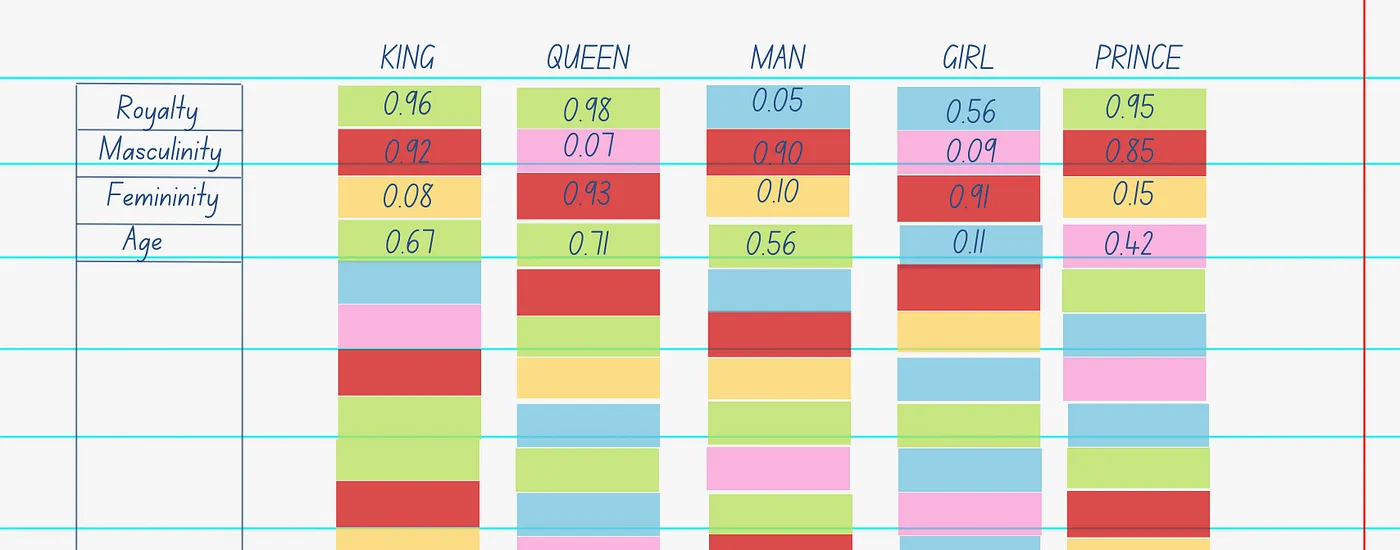

In [103]:
import gensim

In [104]:
y = data['class'].values

In [105]:
x= [d.split() for d in data['text'].tolist()]

In [106]:
type(x)

list

In [107]:
print(x[1])

['ukrainian', 'lawmakers', 'on', 'thursday', 'shelved', 'a', 'draft', 'law', 'that', 'critics', 'say', 'would', 'have', 'undermined', 'the', 'independence', 'of', 'anti-corruption', 'institutions,', 'which', 'ukraine', 's', 'foreign', 'backers', 'this', 'week', 'said', 'were', 'under', 'attack', 'from', 'vested', 'interests.', 'reformists', 'welcomed', 'the', 'removal', 'of', 'the', 'bill', 'from', 'parliament', 's', 'agenda', 'as', 'a', 'win', 'at', 'a', 'time', 'when', 'ukraine', 's', 'western-backed', 'corruption', 'fight', 'faces', 'pushback', 'on', 'several', 'fronts.', 'but', 'the', 'victory', 'was', 'swiftly', 'tempered', 'by', 'a', 'separate', 'vote', 'later', 'to', 'dismiss', 'the', 'european', 'union-backed', 'head', 'of', 'parliament', 's', 'anti-graft', 'committee', 'yegor', 'sobolev.', 'the', 'international', 'monetary', 'fund', 'and', 'the', 'world', 'bank', 'earlier', 'said', 'the', 'authorities', 'must', 'protect', 'the', 'anti-graft', 'bureau', 'known', 'as', 'nabu,', 

In [108]:
DIM = 100
w2v_model=gensim.models.Word2Vec(sentences=x, vector_size=DIM, window=10, min_count=1)

In [110]:
len(w2v_model.wv.key_to_index)

375373

In [111]:
w2v_model.wv['india']

array([ 3.80579859e-01,  2.42215586e+00, -8.81444097e-01, -1.52937663e+00,
       -8.40979099e-01,  1.94531631e+00, -2.53800225e+00,  2.39116454e+00,
        8.22092950e-01,  1.47966313e+00, -6.85650766e-01, -2.09188437e+00,
       -5.52022398e-01,  1.32664132e+00,  6.52602017e-01, -2.88348866e+00,
        1.37852204e+00,  6.71630502e-01, -1.66140366e+00,  1.18086196e-01,
        7.94133961e-01, -7.93653131e-01,  2.06098938e+00,  2.41907382e+00,
       -4.75868016e-01, -1.16772187e+00,  3.67544666e-02,  3.75605941e-01,
       -2.39400411e+00,  3.51505667e-01, -4.30129349e-01, -1.42202042e-02,
       -1.84100926e+00,  1.17921107e-01, -2.47417021e+00,  9.47026074e-01,
        4.29445839e+00, -1.03755474e+00, -1.13135114e-01, -2.36622557e-01,
       -2.21314406e+00, -2.15484786e+00, -3.77039361e+00,  1.02710462e+00,
       -1.27288058e-01, -2.14747310e+00,  3.64973545e-01,  1.92557228e+00,
        4.77008373e-01,  4.05867243e+00, -3.66300732e-01, -2.86277604e+00,
        1.03088960e-01, -

In [112]:
w2v_model.wv.most_similar('india')

[('pakistan', 0.7774356007575989),
 ('malaysia', 0.7705758810043335),
 ('india,', 0.7642041444778442),
 ('thailand', 0.7395376563072205),
 ('philippines', 0.7259619235992432),
 ('china', 0.7243671417236328),
 ('india.', 0.7169716358184814),
 ('pakistan,', 0.71547532081604),
 ('china,', 0.7144743800163269),
 ('beijing', 0.7107194066047668)]

In [113]:
w2v_model.wv.most_similar('china')

[('beijing', 0.901869535446167),
 ('taiwan', 0.8277931213378906),
 ('china’s', 0.7691291570663452),
 ('chinese', 0.753729522228241),
 ('china,', 0.753508985042572),
 ('pyongyang', 0.7512103915214539),
 ('taiwan,', 0.7492931485176086),
 ('japan', 0.7443453669548035),
 ('xi', 0.7398763298988342),
 ('china.', 0.7333171963691711)]

In [114]:
w2v_model.wv.most_similar('modi')

[('narendra', 0.7281777858734131),
 ('modi’s', 0.6804021596908569),
 ('beijing', 0.6759530901908875),
 ('macron,', 0.6744672656059265),
 ('najib', 0.6697742342948914),
 ('india', 0.6692371964454651),
 ('turnbull', 0.6590744256973267),
 ('tokyo', 0.6572808027267456),
 ('thailand', 0.6556349992752075),
 ('abe,', 0.6515997648239136)]

In [115]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)

In [116]:
x = tokenizer.texts_to_sequences(x)

In [117]:
tokenizer.word_index

{'the': 1,
 'to': 2,
 'of': 3,
 'a': 4,
 'and': 5,
 'in': 6,
 'that': 7,
 'on': 8,
 'for': 9,
 's': 10,
 'is': 11,
 'he': 12,
 'with': 13,
 'was': 14,
 'it': 15,
 'trump': 16,
 'as': 17,
 'his': 18,
 'by': 19,
 'said': 20,
 'has': 21,
 'be': 22,
 'have': 23,
 'from': 24,
 'not': 25,
 'at': 26,
 'are': 27,
 'this': 28,
 'who': 29,
 'an': 30,
 'they': 31,
 'but': 32,
 'would': 33,
 'we': 34,
 'i': 35,
 'about': 36,
 'u.s.': 37,
 'will': 38,
 'their': 39,
 'president': 40,
 'had': 41,
 'been': 42,
 'you': 43,
 't': 44,
 'were': 45,
 'or': 46,
 'after': 47,
 'which': 48,
 'more': 49,
 'she': 50,
 'people': 51,
 'her': 52,
 'one': 53,
 'if': 54,
 'what': 55,
 'when': 56,
 'new': 57,
 'out': 58,
 'all': 59,
 'its': 60,
 'also': 61,
 'over': 62,
 'donald': 63,
 'state': 64,
 'no': 65,
 'up': 66,
 'our': 67,
 'there': 68,
 'can': 69,
 'said.': 70,
 'just': 71,
 'than': 72,
 'house': 73,
 'other': 74,
 'some': 75,
 'could': 76,
 'republican': 77,
 'obama': 78,
 'into': 79,
 'told': 80,
 'united

In [118]:
[len(x) for x in x]

[829,
 463,
 1166,
 355,
 151,
 276,
 270,
 333,
 114,
 327,
 696,
 223,
 381,
 759,
 136,
 241,
 330,
 310,
 658,
 195,
 216,
 11,
 347,
 91,
 121,
 622,
 97,
 375,
 330,
 458,
 528,
 484,
 814,
 550,
 490,
 479,
 379,
 364,
 402,
 446,
 99,
 40,
 216,
 1223,
 593,
 151,
 209,
 594,
 441,
 428,
 140,
 556,
 332,
 1943,
 415,
 318,
 587,
 332,
 378,
 1133,
 84,
 670,
 567,
 228,
 690,
 83,
 315,
 458,
 865,
 405,
 950,
 497,
 900,
 456,
 81,
 1440,
 170,
 888,
 92,
 80,
 239,
 544,
 241,
 287,
 586,
 419,
 934,
 495,
 122,
 24,
 440,
 476,
 407,
 677,
 284,
 326,
 697,
 255,
 246,
 493,
 268,
 611,
 509,
 454,
 197,
 22,
 156,
 400,
 444,
 96,
 658,
 353,
 979,
 620,
 774,
 293,
 277,
 285,
 238,
 87,
 440,
 327,
 803,
 443,
 338,
 398,
 1881,
 355,
 160,
 426,
 316,
 45,
 366,
 611,
 556,
 356,
 371,
 318,
 702,
 376,
 341,
 77,
 283,
 405,
 249,
 405,
 605,
 65,
 354,
 187,
 93,
 351,
 397,
 95,
 53,
 757,
 527,
 268,
 456,
 496,
 702,
 688,
 408,
 408,
 364,
 1017,
 450,
 1380,
 122

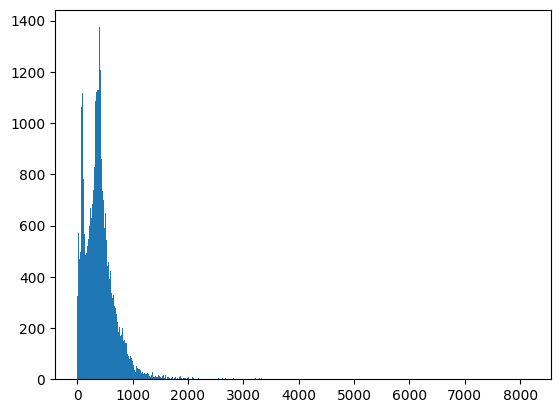

In [119]:
plt.hist([len(x) for x in x], bins=700)
plt.show()

In [120]:
nos = np.array([len(x) for x in x])
len(nos[nos>1000])

1603

In [121]:
maxlen = 500
x = pad_sequences(x, maxlen=maxlen)

In [122]:
len(x[101])

500

In [125]:
vocab_size = len(tokenizer.word_index) + 1
vocab = tokenizer.word_index

In [126]:
def get_weight_matrix(model):
  weight_matrix = np.zeros((vocab_size, DIM))

  for word, i in vocab.items():
    if word in model.wv:
      weight_matrix[i] = model.wv[word]

  return weight_matrix

In [127]:
embedding_vectors = get_weight_matrix(w2v_model)

In [128]:
embedding_vectors.shape

(375374, 100)

Creating the model


In [129]:
model = Sequential()
model.add(Embedding(vocab_size, output_dim=DIM, weights = [embedding_vectors], trainable=True))
model.add(LSTM(units=128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [130]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │    37,537,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,537,400 (143.19 MB)

 Trainable params: 37,537,400 (143.19 MB)

 Non-trainable params: 0 (0.00 B)

In [131]:
print("x shape:", np.shape(x))
print("y shape:", np.shape(y))


x shape: (44897, 500)
y shape: (44897,)


In [133]:
X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y)

In [134]:
history = model.fit(X_train, y_train, validation_split=0.3, epochs=6)

Epoch 1/6
737/737 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - acc: 0.9505 - loss: 0.1269 - val_acc: 0.9878 - val_loss: 0.0381
Epoch 2/6
737/737 ━━━━━━━━━━━━━━━━━━━━ 40s 42ms/step - acc: 0.9924 - loss: 0.0232 - val_acc: 0.9935 - val_loss: 0.0198
Epoch 3/6
737/737 ━━━━━━━━━━━━━━━━━━━━ 44s 46ms/step - acc: 0.9989 - loss: 0.0040 - val_acc: 0.9935 - val_loss: 0.0230
Epoch 4/6
737/737 ━━━━━━━━━━━━━━━━━━━━ 39s 43ms/step - acc: 0.9999 - loss: 0.0012 - val_acc: 0.9940 - val_loss: 0.0245
Epoch 5/6
737/737 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - acc: 0.9999 - loss: 3.5206e-04 - val_acc: 0.9944 - val_loss: 0.0240
Epoch 6/6
737/737 ━━━━━━━━━━━━━━━━━━━━ 32s 43ms/step - acc: 1.0000 - loss: 1.0118e-04 - val_acc: 0.9944 - val_loss: 0.0275


In [135]:
y_pred = (model.predict(X_test) >=0.5).astype(int)

351/351 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [136]:
accuracy_score(y_test, y_pred)

0.995011135857461

In [137]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5871
           1       0.99      0.99      0.99      5354

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



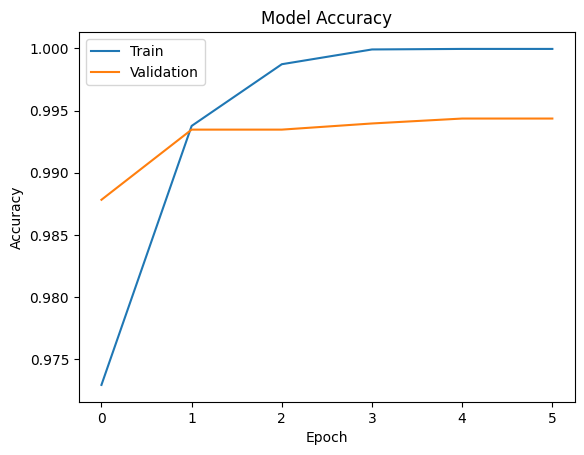

In [138]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [139]:
x = ['The Prime Minister announced new agricultural reforms today.']
x= tokenizer.texts_to_sequences(x)
x= pad_sequences(x, maxlen=maxlen)
(model.predict(x) >=0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


array([[1]])

In [140]:
model.save('model.h5')


In [141]:
from google.colab import files
files.download('model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [142]:
import pickle

with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [143]:
files.download('tokenizer.pickle')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>